In [1]:
%run data_loader.ipynb
%run utils.ipynb

In [2]:
# Load test datset

test_dataset = RadarDataset(data_transform, './data/images_test/')
sunny_test_dataset = RadarDataset_each(data_transform, './data/each_weather/images_test_sunny/')
fog_test_dataset = RadarDataset_each(data_transform, './data/each_weather/images_test_fog/')
rain_test_dataset = RadarDataset_each(data_transform, './data/each_weather/images_test_rain/')
night_test_dataset = RadarDataset_each(data_transform, './data/each_weather/images_test_night/')

test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, collate_fn=collate_fn)
sunny_test_data_loader = torch.utils.data.DataLoader(sunny_test_dataset, batch_size=1, collate_fn=collate_fn)
fog_test_data_loader = torch.utils.data.DataLoader(fog_test_dataset, batch_size=1, collate_fn=collate_fn)
rain_test_data_loader = torch.utils.data.DataLoader(rain_test_dataset, batch_size=1, collate_fn=collate_fn)
night_test_data_loader = torch.utils.data.DataLoader(night_test_dataset, batch_size=1, collate_fn=collate_fn)

In [3]:
# Test
total_AP = []
sunny_AP = []
fog_AP = []
rain_AP = []
night_AP = []

model = get_model_instance_segmentation(2)
model.to(device)

for i in range(15):
    model.load_state_dict(torch.load('./model/ex1_'+str(i+1)+'.pt'))
    model.eval()
    
    # Total AP Caculation
    labels = []
    preds_adj_all = []
    annot_all = []
    for im, annot in tqdm(test_data_loader, position = 0, leave = True):
        im = list(img.to(device) for img in im)
        for t in annot:
            labels += t['labels']
        with torch.no_grad():
            preds_adj = make_prediction(model, im, 0.5)
            preds_adj = [{k: v.to(torch.device('cpu')) for k, v in t.items()} for t in preds_adj]
            preds_adj_all.append(preds_adj)
            annot_all.append(annot)
    sample_metrics = []
    for batch_i in range(len(preds_adj_all)):
        sample_metrics += get_batch_statistics(preds_adj_all[batch_i], annot_all[batch_i], iou_threshold=0.5) 
    true_positives, pred_scores, pred_labels = [torch.cat(x, 0) for x in list(zip(*sample_metrics))]
    precision, recall, AP, f1, ap_class = ap_per_class(true_positives, pred_scores, pred_labels, torch.tensor(labels))
    mAP_total = torch.mean(AP)
    total_AP.append(mAP_total.item())
    print(f'Total AP : {mAP_total}'+'_'+str(i+1))
    
    
    # Sunny AP Caculation
    labels = []
    preds_adj_all = []
    annot_all = []
    for im, annot in tqdm(sunny_test_data_loader, position = 0, leave = True):
        im = list(img.to(device) for img in im)
        for t in annot:
            labels += t['labels']
        with torch.no_grad():
            preds_adj = make_prediction(model, im, 0.5)
            preds_adj = [{k: v.to(torch.device('cpu')) for k, v in t.items()} for t in preds_adj]
            preds_adj_all.append(preds_adj)
            annot_all.append(annot)
    sample_metrics = []
    for batch_i in range(len(preds_adj_all)):
        sample_metrics += get_batch_statistics(preds_adj_all[batch_i], annot_all[batch_i], iou_threshold=0.5) 
    true_positives, pred_scores, pred_labels = [torch.cat(x, 0) for x in list(zip(*sample_metrics))]
    precision, recall, AP, f1, ap_class = ap_per_class(true_positives, pred_scores, pred_labels, torch.tensor(labels))
    mAP_sunny = torch.mean(AP)
    sunny_AP.append(mAP_sunny.item())
    print(f'Sunny AP : {mAP_sunny}'+'_'+str(i+1))
    
    # Fog AP Caculation
    labels = []
    preds_adj_all = []
    annot_all = []
    for im, annot in tqdm(fog_test_data_loader, position = 0, leave = True):
        im = list(img.to(device) for img in im)
        for t in annot:
            labels += t['labels']
        with torch.no_grad():
            preds_adj = make_prediction(model, im, 0.5)
            preds_adj = [{k: v.to(torch.device('cpu')) for k, v in t.items()} for t in preds_adj]
            preds_adj_all.append(preds_adj)
            annot_all.append(annot)
    sample_metrics = []
    for batch_i in range(len(preds_adj_all)):
        sample_metrics += get_batch_statistics(preds_adj_all[batch_i], annot_all[batch_i], iou_threshold=0.5) 
    true_positives, pred_scores, pred_labels = [torch.cat(x, 0) for x in list(zip(*sample_metrics))]
    precision, recall, AP, f1, ap_class = ap_per_class(true_positives, pred_scores, pred_labels, torch.tensor(labels))
    mAP_fog = torch.mean(AP)
    fog_AP.append(mAP_fog.item())
    print(f'Fog AP : {mAP_fog}'+'_'+str(i+1))
    
    # Rain AP Caculation
    labels = []
    preds_adj_all = []
    annot_all = []
    for im, annot in tqdm(rain_test_data_loader, position = 0, leave = True):
        im = list(img.to(device) for img in im)
        for t in annot:
            labels += t['labels']
        with torch.no_grad():
            preds_adj = make_prediction(model, im, 0.5)
            preds_adj = [{k: v.to(torch.device('cpu')) for k, v in t.items()} for t in preds_adj]
            preds_adj_all.append(preds_adj)
            annot_all.append(annot)
    sample_metrics = []
    for batch_i in range(len(preds_adj_all)):
        sample_metrics += get_batch_statistics(preds_adj_all[batch_i], annot_all[batch_i], iou_threshold=0.5) 
    true_positives, pred_scores, pred_labels = [torch.cat(x, 0) for x in list(zip(*sample_metrics))]
    precision, recall, AP, f1, ap_class = ap_per_class(true_positives, pred_scores, pred_labels, torch.tensor(labels))
    mAP_rain = torch.mean(AP)
    rain_AP.append(mAP_rain.item())
    print(f'Rain AP : {mAP_rain}'+'_'+str(i+1))
    
    # Night AP Caculation
    labels = []
    preds_adj_all = []
    annot_all = []
    for im, annot in tqdm(night_test_data_loader, position = 0, leave = True):
        im = list(img.to(device) for img in im)
        for t in annot:
            labels += t['labels']
        with torch.no_grad():
            preds_adj = make_prediction(model, im, 0.5)
            preds_adj = [{k: v.to(torch.device('cpu')) for k, v in t.items()} for t in preds_adj]
            preds_adj_all.append(preds_adj)
            annot_all.append(annot)
    sample_metrics = []
    for batch_i in range(len(preds_adj_all)):
        sample_metrics += get_batch_statistics(preds_adj_all[batch_i], annot_all[batch_i], iou_threshold=0.5) 
    true_positives, pred_scores, pred_labels = [torch.cat(x, 0) for x in list(zip(*sample_metrics))]
    precision, recall, AP, f1, ap_class = ap_per_class(true_positives, pred_scores, pred_labels, torch.tensor(labels))
    mAP_night = torch.mean(AP)
    night_AP.append(mAP_night.item())
    print(f'Night AP : {mAP_night}'+'_'+str(i+1))

100%|███████████████████████████████████████| 1023/1023 [01:21<00:00, 12.55it/s]


Total AP : 0.742124953092725_1


100%|█████████████████████████████████████████| 300/300 [00:23<00:00, 12.54it/s]


Sunny AP : 0.8379596429788627_1


100%|█████████████████████████████████████████| 106/106 [00:08<00:00, 12.29it/s]


Fog AP : 0.6631998983162442_1


100%|█████████████████████████████████████████| 321/321 [00:26<00:00, 12.02it/s]


Rain AP : 0.7068268514629048_1


100%|█████████████████████████████████████████| 296/296 [00:24<00:00, 12.31it/s]


Night AP : 0.8338748220827923_1


100%|███████████████████████████████████████| 1023/1023 [01:23<00:00, 12.32it/s]


Total AP : 0.8043540817273662_2


100%|█████████████████████████████████████████| 300/300 [00:23<00:00, 12.52it/s]


Sunny AP : 0.9075395665682571_2


100%|█████████████████████████████████████████| 106/106 [00:08<00:00, 12.39it/s]


Fog AP : 0.8278246292919249_2


100%|█████████████████████████████████████████| 321/321 [00:26<00:00, 12.09it/s]


Rain AP : 0.7739355768398704_2


100%|█████████████████████████████████████████| 296/296 [00:23<00:00, 12.46it/s]


Night AP : 0.8269660676791579_2


100%|███████████████████████████████████████| 1023/1023 [01:23<00:00, 12.26it/s]


Total AP : 0.8595262069521379_3


100%|█████████████████████████████████████████| 300/300 [00:24<00:00, 12.48it/s]


Sunny AP : 0.9346258977693207_3


100%|█████████████████████████████████████████| 106/106 [00:08<00:00, 12.22it/s]


Fog AP : 0.8609247120724_3


100%|█████████████████████████████████████████| 321/321 [00:26<00:00, 12.07it/s]


Rain AP : 0.8309224746197921_3


100%|█████████████████████████████████████████| 296/296 [00:23<00:00, 12.54it/s]


Night AP : 0.9048111361151374_3


100%|███████████████████████████████████████| 1023/1023 [01:23<00:00, 12.24it/s]


Total AP : 0.8867432513275963_4


100%|█████████████████████████████████████████| 300/300 [00:24<00:00, 12.49it/s]


Sunny AP : 0.9586510414817191_4


100%|█████████████████████████████████████████| 106/106 [00:08<00:00, 12.16it/s]


Fog AP : 0.9265799839621707_4


100%|█████████████████████████████████████████| 321/321 [00:26<00:00, 12.11it/s]


Rain AP : 0.8580643565413415_4


100%|█████████████████████████████████████████| 296/296 [00:23<00:00, 12.41it/s]


Night AP : 0.920854375813696_4


100%|███████████████████████████████████████| 1023/1023 [01:23<00:00, 12.30it/s]


Total AP : 0.9018603776271474_5


100%|█████████████████████████████████████████| 300/300 [00:24<00:00, 12.45it/s]


Sunny AP : 0.9511330881146307_5


100%|█████████████████████████████████████████| 106/106 [00:08<00:00, 12.32it/s]


Fog AP : 0.9222463743678517_5


100%|█████████████████████████████████████████| 321/321 [00:26<00:00, 12.14it/s]


Rain AP : 0.8827838729086883_5


100%|█████████████████████████████████████████| 296/296 [00:23<00:00, 12.51it/s]


Night AP : 0.9261131944560521_5


100%|███████████████████████████████████████| 1023/1023 [01:22<00:00, 12.34it/s]


Total AP : 0.8859021060093997_6


100%|█████████████████████████████████████████| 300/300 [00:24<00:00, 12.47it/s]


Sunny AP : 0.9319484611568338_6


100%|█████████████████████████████████████████| 106/106 [00:08<00:00, 12.21it/s]


Fog AP : 0.8751036303919619_6


100%|█████████████████████████████████████████| 321/321 [00:26<00:00, 12.17it/s]


Rain AP : 0.8704371354751057_6


100%|█████████████████████████████████████████| 296/296 [00:23<00:00, 12.40it/s]


Night AP : 0.9135514000481719_6


100%|███████████████████████████████████████| 1023/1023 [01:23<00:00, 12.30it/s]


Total AP : 0.9079438600891852_7


100%|█████████████████████████████████████████| 300/300 [00:24<00:00, 12.50it/s]


Sunny AP : 0.9422660282753341_7


100%|█████████████████████████████████████████| 106/106 [00:08<00:00, 12.60it/s]


Fog AP : 0.9220653353738761_7


100%|█████████████████████████████████████████| 321/321 [00:26<00:00, 12.14it/s]


Rain AP : 0.8966651474838008_7


100%|█████████████████████████████████████████| 296/296 [00:23<00:00, 12.44it/s]


Night AP : 0.9211742825576898_7


100%|███████████████████████████████████████| 1023/1023 [01:22<00:00, 12.47it/s]


Total AP : 0.9107352752867586_8


100%|█████████████████████████████████████████| 300/300 [00:23<00:00, 12.52it/s]


Sunny AP : 0.9432647429853045_8


100%|█████████████████████████████████████████| 106/106 [00:08<00:00, 12.36it/s]


Fog AP : 0.9179889547558062_8


100%|█████████████████████████████████████████| 321/321 [00:26<00:00, 12.34it/s]


Rain AP : 0.8987015176507569_8


100%|█████████████████████████████████████████| 296/296 [00:23<00:00, 12.45it/s]


Night AP : 0.927796543729237_8


100%|███████████████████████████████████████| 1023/1023 [01:21<00:00, 12.48it/s]


Total AP : 0.9022704253473933_9


100%|█████████████████████████████████████████| 300/300 [00:23<00:00, 12.68it/s]


Sunny AP : 0.9371134967276564_9


100%|█████████████████████████████████████████| 106/106 [00:08<00:00, 12.51it/s]


Fog AP : 0.9025479503744371_9


100%|█████████████████████████████████████████| 321/321 [00:26<00:00, 12.26it/s]


Rain AP : 0.8886949548450884_9


100%|█████████████████████████████████████████| 296/296 [00:23<00:00, 12.41it/s]


Night AP : 0.9299810136643876_9


100%|███████████████████████████████████████| 1023/1023 [01:21<00:00, 12.48it/s]


Total AP : 0.9099800723601037_10


100%|█████████████████████████████████████████| 300/300 [00:24<00:00, 12.49it/s]


Sunny AP : 0.9326358170725513_10


100%|█████████████████████████████████████████| 106/106 [00:08<00:00, 12.42it/s]


Fog AP : 0.9245009696680704_10


100%|█████████████████████████████████████████| 321/321 [00:26<00:00, 12.24it/s]


Rain AP : 0.8990630004260618_10


100%|█████████████████████████████████████████| 296/296 [00:23<00:00, 12.60it/s]


Night AP : 0.9324104177695656_10


100%|███████████████████████████████████████| 1023/1023 [01:21<00:00, 12.50it/s]


Total AP : 0.8984716062189486_11


100%|█████████████████████████████████████████| 300/300 [00:24<00:00, 12.36it/s]


Sunny AP : 0.9416834482504726_11


100%|█████████████████████████████████████████| 106/106 [00:08<00:00, 12.30it/s]


Fog AP : 0.919886498085404_11


100%|█████████████████████████████████████████| 321/321 [00:26<00:00, 12.31it/s]


Rain AP : 0.8864879625756874_11


100%|█████████████████████████████████████████| 296/296 [00:23<00:00, 12.54it/s]


Night AP : 0.9066889325271752_11


100%|███████████████████████████████████████| 1023/1023 [01:22<00:00, 12.33it/s]


Total AP : 0.9006734266731762_12


100%|█████████████████████████████████████████| 300/300 [00:24<00:00, 12.45it/s]


Sunny AP : 0.9448947374733656_12


100%|█████████████████████████████████████████| 106/106 [00:08<00:00, 12.61it/s]


Fog AP : 0.8902035464824216_12


100%|█████████████████████████████████████████| 321/321 [00:26<00:00, 12.29it/s]


Rain AP : 0.8911894006008554_12


100%|█████████████████████████████████████████| 296/296 [00:23<00:00, 12.45it/s]


Night AP : 0.9104993638995502_12


100%|███████████████████████████████████████| 1023/1023 [01:22<00:00, 12.39it/s]


Total AP : 0.8943236458502388_13


100%|█████████████████████████████████████████| 300/300 [00:24<00:00, 12.47it/s]


Sunny AP : 0.930603977469783_13


100%|█████████████████████████████████████████| 106/106 [00:08<00:00, 12.45it/s]


Fog AP : 0.8621801118117638_13


100%|█████████████████████████████████████████| 321/321 [00:26<00:00, 12.29it/s]


Rain AP : 0.8884164024190078_13


100%|█████████████████████████████████████████| 296/296 [00:23<00:00, 12.42it/s]


Night AP : 0.9053759952660347_13


100%|███████████████████████████████████████| 1023/1023 [01:22<00:00, 12.40it/s]


Total AP : 0.8939174529128682_14


100%|█████████████████████████████████████████| 300/300 [00:23<00:00, 12.53it/s]


Sunny AP : 0.942514741255799_14


100%|█████████████████████████████████████████| 106/106 [00:08<00:00, 12.40it/s]


Fog AP : 0.874477477979827_14


100%|█████████████████████████████████████████| 321/321 [00:26<00:00, 12.27it/s]


Rain AP : 0.8858320661609138_14


100%|█████████████████████████████████████████| 296/296 [00:23<00:00, 12.52it/s]


Night AP : 0.9019895416479022_14


100%|███████████████████████████████████████| 1023/1023 [01:22<00:00, 12.37it/s]


Total AP : 0.8941685476297234_15


100%|█████████████████████████████████████████| 300/300 [00:24<00:00, 12.47it/s]


Sunny AP : 0.9302844514213042_15


100%|█████████████████████████████████████████| 106/106 [00:08<00:00, 12.31it/s]


Fog AP : 0.8875266592597164_15


100%|█████████████████████████████████████████| 321/321 [00:26<00:00, 12.28it/s]


Rain AP : 0.8857653440149118_15


100%|█████████████████████████████████████████| 296/296 [00:23<00:00, 12.51it/s]


Night AP : 0.9049135522124447_15


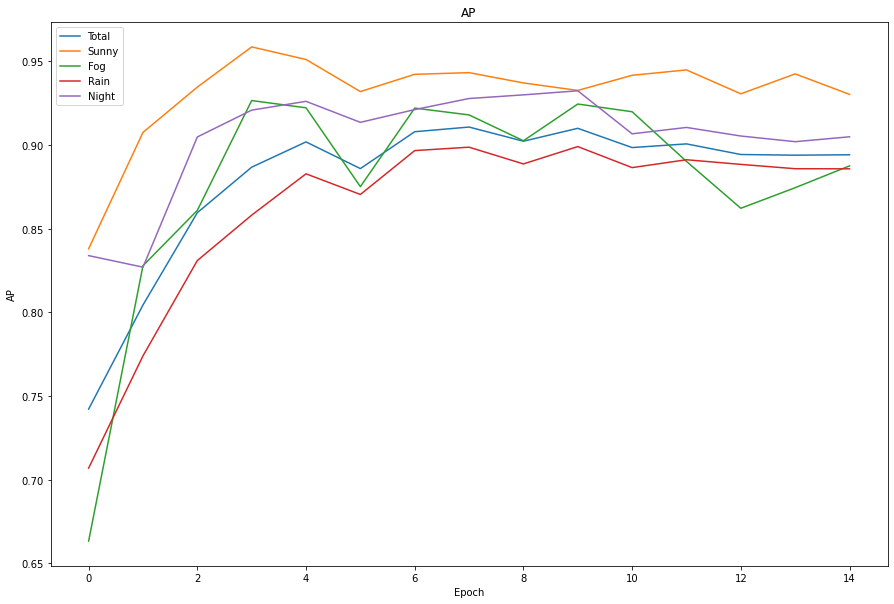

In [4]:
# Test result
y1 = total_AP
y2 = sunny_AP
y3 = fog_AP
y4 = rain_AP
y5 = night_AP
x = list(range(0,len(y1)))

plt.figure(figsize=(15,10))
plt.plot(x, y1, label = "Total")
plt.plot(x, y2, label = "Sunny")
plt.plot(x, y3, label = "Fog")
plt.plot(x, y4, label = "Rain")
plt.plot(x, y5, label = "Night")
plt.xlabel('Epoch')
plt.ylabel('AP')
plt.title('AP')
plt.legend()
plt.show()

In [5]:
# Find max APs

(m,i) = max((v,i) for i,v in enumerate(total_AP))
print (m,i)

(m,i) = max((v,i) for i,v in enumerate(sunny_AP))
print (m,i)

(m,i) = max((v,i) for i,v in enumerate(fog_AP))
print (m,i)

(m,i) = max((v,i) for i,v in enumerate(rain_AP))
print (m,i)

(m,i) = max((v,i) for i,v in enumerate(night_AP))
print (m,i)

0.9107352752867586 7
0.9586510414817191 3
0.9265799839621707 3
0.8990630004260618 9
0.9324104177695656 9


In [6]:
print(total_AP)
print(sunny_AP)
print(fog_AP)
print(rain_AP)
print(night_AP)

[0.742124953092725, 0.8043540817273662, 0.8595262069521379, 0.8867432513275963, 0.9018603776271474, 0.8859021060093997, 0.9079438600891852, 0.9107352752867586, 0.9022704253473933, 0.9099800723601037, 0.8984716062189486, 0.9006734266731762, 0.8943236458502388, 0.8939174529128682, 0.8941685476297234]
[0.8379596429788627, 0.9075395665682571, 0.9346258977693207, 0.9586510414817191, 0.9511330881146307, 0.9319484611568338, 0.9422660282753341, 0.9432647429853045, 0.9371134967276564, 0.9326358170725513, 0.9416834482504726, 0.9448947374733656, 0.930603977469783, 0.942514741255799, 0.9302844514213042]
[0.6631998983162442, 0.8278246292919249, 0.8609247120724, 0.9265799839621707, 0.9222463743678517, 0.8751036303919619, 0.9220653353738761, 0.9179889547558062, 0.9025479503744371, 0.9245009696680704, 0.919886498085404, 0.8902035464824216, 0.8621801118117638, 0.874477477979827, 0.8875266592597164]
[0.7068268514629048, 0.7739355768398704, 0.8309224746197921, 0.8580643565413415, 0.8827838729086883, 0.87

In [8]:
i = 7
print (total_AP[i])
print (sunny_AP[i])
print (fog_AP[i])
print (rain_AP[i])
print (night_AP[i])

0.9107352752867586
0.9432647429853045
0.9179889547558062
0.8987015176507569
0.927796543729237
